---
title: "Blog Post: Gradient Descent"
formet:
  html:
    code-fold: false
jupyter: python3
---

link to gradient_descent.py: https://github.com/charlotte-zhuang03/github_charlotte-zhuang03.github.io/blob/main/posts/Blog_Post_Gradient_Descent/gradient_descent.py

### Implementation of Logistic Regression with Gradient Descent

#### Gradient descent update of weight vector w follows this formula:

$$w^{(t+1)} \leftarrow w^{(t)} - \alpha \nabla L(w^{(t)})$$

1. Compute gradient of the empirical risk for logistic regression $\nabla L(w)$ \
   As shown in the class notes, $$\nabla L(w) = \frac{1}{n} * \sum \limits _{i=1} ^{n} (\sigma (<w, x_i>) - y_i)*x_i $$ We can calculate the gradient according to this formula, as illustrated in the gradient_descent function in the source code.

2. For every step in the updating process: \
    We subtract $\alpha \nabla L(w^{(t)})$ from the current weight vector $ w^{(t)}$ to update the weight vector w until convergence.
 
 
#### Loss history update follows this formula:

$$ l(\hat{y}, y) = -ylog\sigma(\hat{y}) - (1-y)log(1-\sigma(\hat{y})) $$

where

$$ \sigma (\hat{y}) = \frac{1}{1+e^{-\hat{y}}} $$

We just need to compute the average value of the loss function and append them to the loss_history list.


#### Stochastic gradient descent update:
The stochastic gradient descent follows the formula:

$$ \nabla_S L(w) = \frac{1}{|S|} \sum \limits_{i \in S} \nabla \sigma (<w, x_i>) - y_i)*x_i $$

We just need to compute the stochastic gradient descent and use it to update the weight vector as suggested by $w^{(t+1)} \leftarrow w^{(t)} - \alpha \nabla L(w^{(t)})$. 

#### Momentum (optional):

Momentum is an optional variable $\beta$ that could possibly accelerate the program. According to p.85 of Hardt and Recht, 

$$w_{k+1} = w_k - \alpha_kg_k(w_k)+ \beta(w_k - w_{k-1}) $$

To implement momentum in fit_stochastic(), we need some variable that stores the previous $w$: $(w_{k-1})$ and current $w$: $(w_k)$ to compute the updated $w$: ($w_{k+1}$).

##### the fit() function:

[1.4488913  1.1878909  0.09130459]
[0.20565486085080245, 0.20524657060908605, 0.20484531938583295, 0.204450929824252, 0.20406323050036534, 0.20368205567548014, 0.20330724506101988, 0.20293864359499791, 0.20257610122946323, 0.20221947272829266]
[0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.83, 0.83, 0.83]


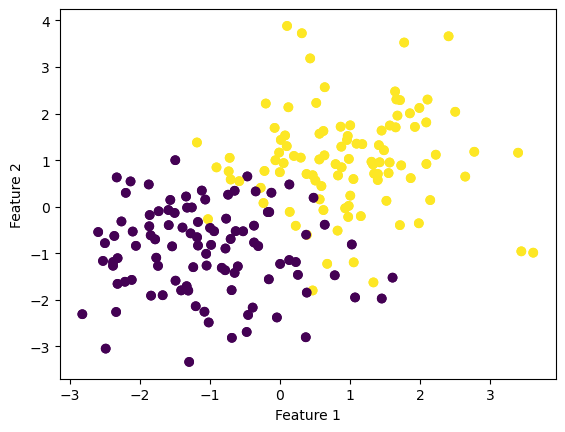

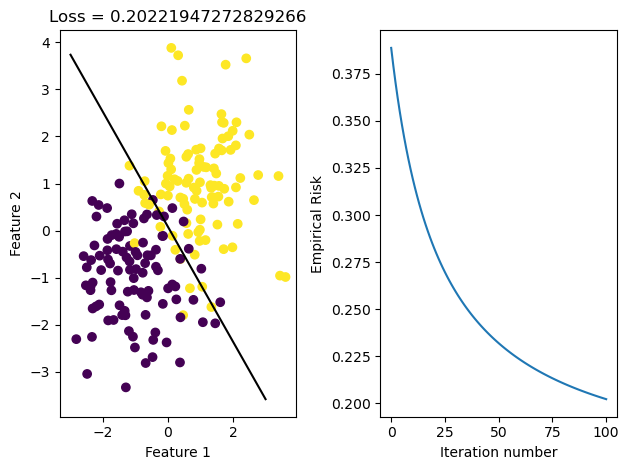

In [11]:
# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

# fit the model

LR = LogisticRegression()
LR.fit(X, y, alpha = 0.1, max_epochs = 100)

# inspect the fitted value of w
print(LR.w)
print(LR.loss_history[-10:])
print(LR.score_history[-10:])


fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

# fit()

loss = LR.loss(X, y)

fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {loss}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

axarr[1].plot(LR.loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
plt.tight_layout()

##### the fit_stochastic() function without momentum:

[0.2259531715343903, 0.22595564897657913, 0.22595554249826233, 0.22595321577323918, 0.22595213303743808, 0.2259497420629399, 0.22595184551921593, 0.2259550169688368, 0.22596294630154048, 0.2259562448794485]


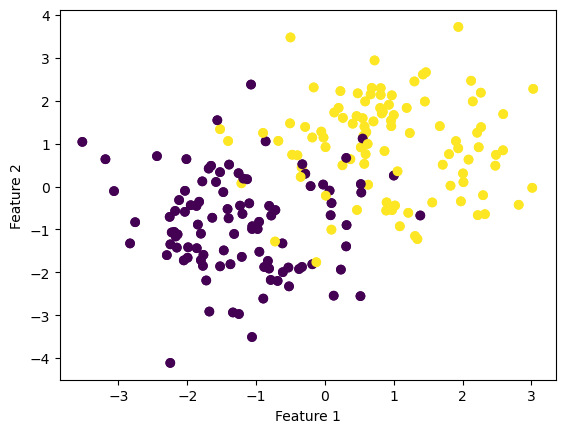

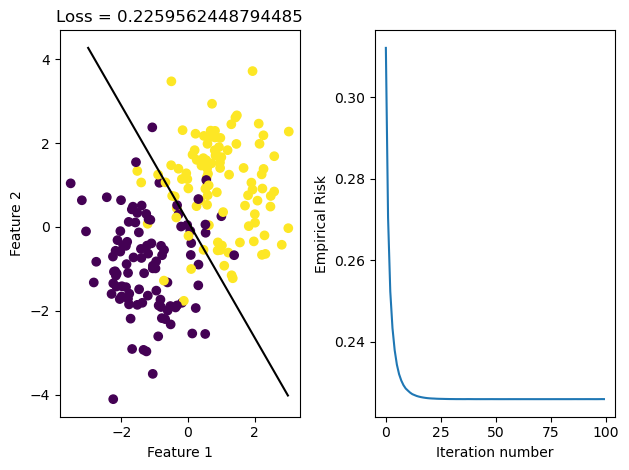

In [12]:
# make the data for stochastic
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

# fit the model

LR = LogisticRegression()
LR.fit_stochastic(X, y, alpha = 0.1, momentum = False, batch_size = 10, max_epochs = 100)

# inspect the fitted value of w
#LR.w 
print(LR.loss_history[-10:])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

# fit_stochastic()

loss = LR.loss(X, y)

fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {loss}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

axarr[1].plot(LR.loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
plt.tight_layout()

##### fit_stochastic() function with momentum:

[0.22597989694657847, 0.22618024352175845, 0.22629191258513107, 0.22608048805295794, 0.2260803900695497, 0.22604297177583932, 0.22599096301984894, 0.22617212604896203, 0.22607907289847376, 0.2259618004982282]


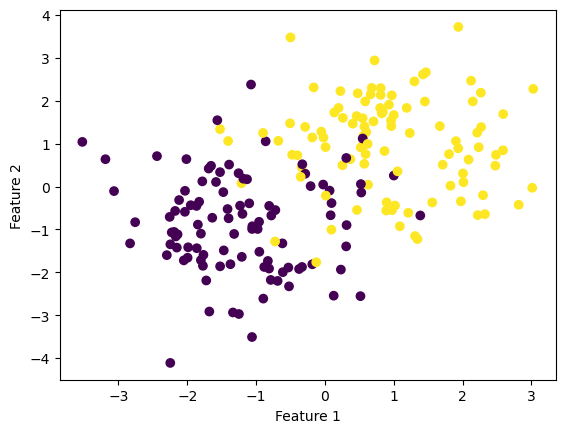

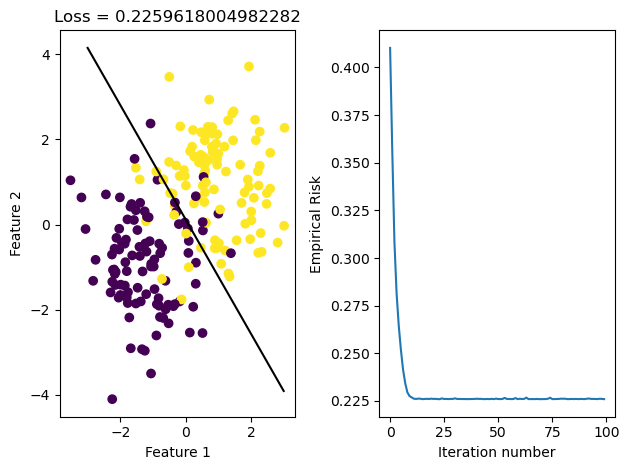

In [13]:
# fit the model

LR = LogisticRegression()
LR.fit_stochastic(X, y, alpha = 0.1, momentum = True, batch_size = 10, max_epochs = 100)

# inspect the fitted value of w
#LR.w 
print(LR.loss_history[-10:])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

# fit_stochastic () with momentum

loss = LR.loss(X, y)

fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {loss}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

axarr[1].plot(LR.loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
plt.tight_layout()

### Experiments

In [1]:
from gradient_descent import LogisticRegression
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

#### Case 1: Gradient Descent does not converge to a minimizer because the learning rate $\alpha$ is too large

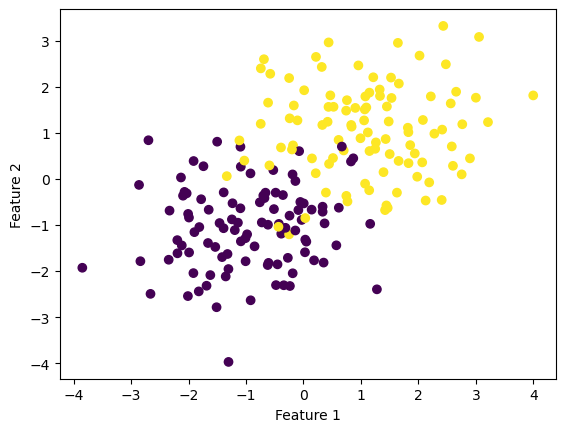

In [17]:
# make the data
p_features = 10
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

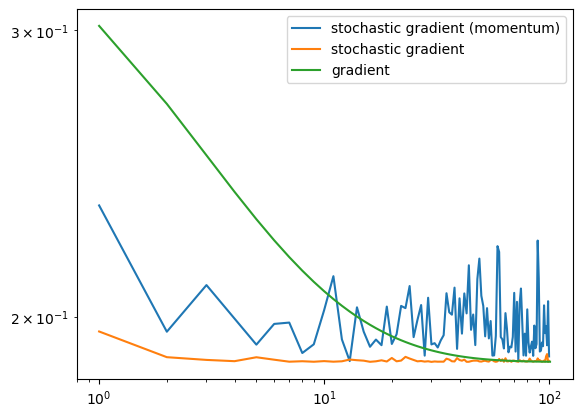

In [18]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  momentum = True, 
                  batch_size = 10, 
                  alpha = .99) 

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (momentum)")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .99)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = .99, max_epochs = 100)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend()

When learning rate $\alpha$ is very large (close to 1), it actually converges. I think there might be something wrong in the description of experiment cases. I think that if learning rate is very small, it might not be able to converge to minimizer, as shown below:

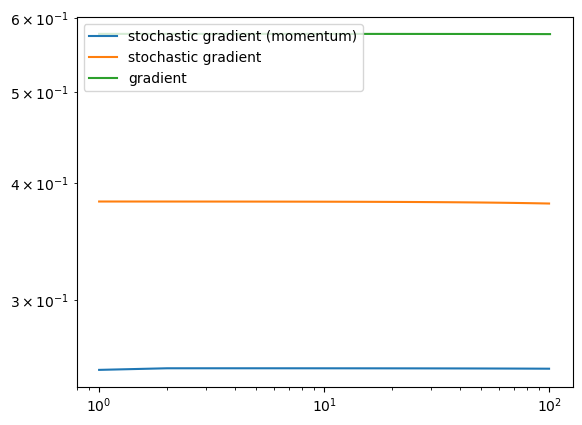

In [19]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  momentum = True, 
                  batch_size = 10, 
                  alpha = .00001) 

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (momentum)")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .00001)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = .00001, max_epochs = 100)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend()

We can see that the learning rate is too small that the gradient descent does not converge to a minimizer.

#### Case 2: The choices of batch size influences how quickly the algorithm converges.

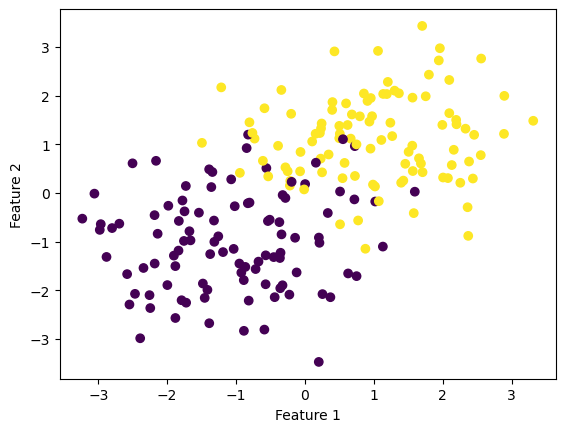

In [21]:
# make the data
p_features = 10
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

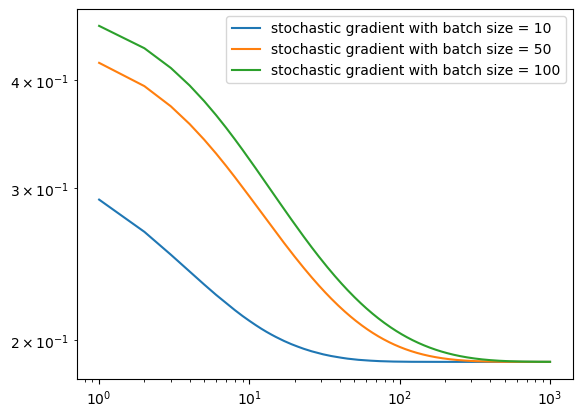

In [22]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 1000, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .05) 

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient with batch size = 10")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 1000, 
                  momentum = False, 
                  batch_size = 50, 
                  alpha = .05)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient with batch size = 50")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 1000, 
                  momentum = False, 
                  batch_size = 100, 
                  alpha = .05)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient with batch size = 100")


plt.loglog()

legend = plt.legend()

It seems that the function with smaller batch size converges faster.

#### Case 3: Comparing the use of momentum to see if it speeds up the convergence

In [ ]:
# make the data
p_features = 10
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

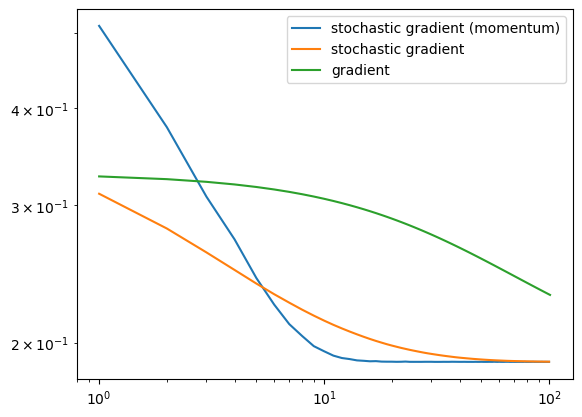

In [23]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  momentum = True, 
                  batch_size = 10, 
                  alpha = .05) 

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (momentum)")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .05)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = .05, max_epochs = 100)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend()

After trying several times, it seems that function with momentum seems to converge faster than the function using normal stochastic gradient and normal empirical risk gradient.